# Deep layer PFC project
The purpose of this project is to understand the contribution of deep L6 corticothalamic (CT) neuron contributions to circuit function and cognition. There is a specific emphasism on circuit function as we predict that based on work in the visual cortex (Olsen et al., 2012; Bortone et al., 2014) and somatosensory cortex (Kim et al., 2014) that deep L6 CT neurons of the mPFC serve to modulate superficial neurons and their gain of activity through intracortical mechanisms and indirect thalamocortical control.

Interestingly, L6 neurons of the barrel cortex, motor cortex, and V1 converge on the finding that L6 CT neurons are generally quiet (O'Connor et al., 2010; Velez-Fort et al., 2014; Beloozerova et al., 2003; Harris and Shepherd, 2015). L6 CT neurons seem to become preferentially tuned to perceptually relevant information (Velez-Fort et al., 2014) and exhibit some of the strongest task correlates found amongst PFC projection neurons (Spellman et al., 2021).

In 2016, Grosmark and Buzsaki discovered that in the hippocampus, there exist sparse firing neurons and rapidly firing neurons. The large majority of spikes are contributed by a small number of fast firing neurons, a finding also observed in the cortex (O'Connor et al., 2014). This is reminicent of a log-scale brain, where a small number of items contribute to a great amount of the noise observed (Buzsaki, 2004).

However, Grosmark and Buzsaki (2016) also found that these sparse firing, quiet neurons, were those cells that shifted their place cell responses, exhibited evidence of plasticity, and became preferentially replayed during SWR activity in sleep - physiological phenomenon associated with memory consolidation. This raises the possibility that a fundamental rule of brain functionality is sparseness - that those neurons with sparse activity patterns are those neurons that learn from experience to shape the functionality of the noisy integrator neurons.

We predict that L6 neurons of the PFC are sparse/quiet, robustly shaped by learning, and modulate noisy-networks to adjust the gain of signals.

## Experiment 1: 
Hypothesis: L6 CT neurons are sparsely firing relative to L5 and L2/3 neurons, but display finer tuning with learning.

## Experiment 2:
Hypothesis: L6 CT neuronal activity serve to suppress L2/3 responses to modulate the gain of a signal.
    -> Prediction: L6 CT stimulation via CrimsonR will suppress the firing activity of L2/3 neurons, but not change the tuning properties

## Experiment 3:
Hypothesis: L6 CT manipulations serve to provide feedback signals to the brain
    -> Prediction: Activation of L6 CT neurons post-choice on the ASST paradigm (Spellman et al., 2021) will improve feedback, enhancing future decision making. However, activation of L6 CT neurons pre-choice or during choice will serve to disrupt decision processes

-----

### Experiment 1

First, lets see if we have evidence of sparse firing activity amongst L6 neurons from Tim's research. 

Tim found that relative to L5 neurons, L6 neurons are:
- Burstier
- Show lower overall activity
- Exhibit stronger choice correlates

I mostly want to see their baseline activity profiles

--

Import packages, including custom code

In [1]:
import os
import sys 
import numpy as np
import suite2p
import scipy.io as sio
import matplotlib.pyplot as plt

local_root = os.path.split(os.path.split(os.getcwd())[0])[0] # local folder (John)
local_packages = os.listdir(local_root) # packages in John folder

# get lab root
lab_root = os.path.split(os.path.split(local_root)[0])[0]
lab_folders = os.listdir(lab_root) # all folders in timspellman dropbox

# get matlab and python folder
matlab_folder = os.path.join(lab_root,'MATLAB')
python_folder = os.path.join(lab_root,'Python')

# add the local packages to path
[sys.path.append(os.path.join(local_root,i,'code')) for i in local_packages]
print("Added the following packages to path:",local_packages)

# import raw_to_tif
from utils import helper_funs
import dataWrangler

Added the following packages to path: ['.ipynb_checkpoints', 'dPCA_demo.ipynb', 'MultiXRegistration', 'PySpell', 'RawFileConverter', 'suite2p_fastplotlib_notebooks']


### First, I want to test with pan-neuronal data, if there is evidence for deep layer modulation of superficially positioned neurons

Reshape your `A` variable as such(MATLAB): squeeze(reshape(neuron.A(:,1),[256 nnn]))

I have that existing caiman hacked code for cross-session reg

In [5]:
datafolder = r"C:\Users\uggriffin\SpellmanLab Dropbox\timspellman\Imaging\hSyn-GCaMP_WCMC"
animals = os.listdir(datafolder); animals = [i for i in animals if '.' not in i]
animal = 't326' #animals[0] # or manually enter
session_type = 'SEDS' # session

# just examine the first session per animal. Start with one animal
mouse_seds = [i for i in os.listdir(os.path.join(datafolder,animal)) if 'SED' in i if '.' not in i]
mouse_seds_folder = os.path.join(datafolder,animal,mouse_seds[0])

# search for data
datafile_part = 'image_moco'
sources   = [i for i in os.listdir(mouse_seds_folder) if datafile_part in i if '.mat' in i if 'sources' in i]
footprint = [i for i in os.listdir(mouse_seds_folder) if datafile_part in i if '.mat' in i if 'footprint' in i]

# load data
#sourcesmat   = sio.loadmat(os.path.join(mouse_seds_folder,sources[0]))
data_footprint, variables = dataWrangler.matpy(os.path.join(mouse_seds_folder,footprint[0])).parsemat()
#data_neuron, variables = dataWrangler.matpy(os.path.join(mouse_seds_folder,sources[0])).parseNeuronStruct()

sources = sio.loadmat(os.path.join(mouse_seds_folder,sources[0]), mat_dtype = True)
print("Available variables in footprint:",variables)
#footprintmat = sio.loadmat(os.path.join(mouse_seds_folder,footprint[0]))

.mat file discovered: image_moco_footprintCNMF_E.mat
Available variables in footprint: ['image', 'med']


In [6]:
sources

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Apr 15 16:47:15 2019',
 '__version__': '1.0',
 '__globals__': [],
 'None': MatlabOpaque([(b'neuron', b'MCOS', b'Sources2D', array([[3707764736],
                      [         2],
                      [         1],
                      [         1],
                      [         1],
                      [         5]], dtype=uint32))                   ],
              dtype=[('s0', 'O'), ('s1', 'O'), ('s2', 'O'), ('arr', 'O')]),
 '__function_workspace__': array([[ 0,  1, 73, ...,  0,  0,  0]], dtype=uint8)}

Plot footprint

Here is the footprint (Component, Y, X): (898, 256, 130)


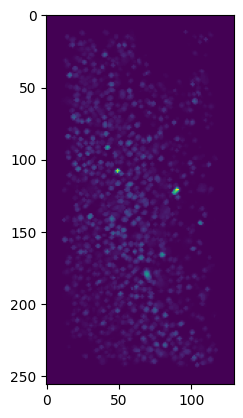

In [51]:
print("Here is the footprint (Component, Y, X):",data_footprint['image'].shape)
summary_image = np.max(data_footprint['image'],axis=0)
plt.imshow(summary_image)

This approach simply uses Tim's `sourcesS2P.mat` files along with the corresponding behavior. I search for the `sourcesS2P.mat` files using the `SEDS` behavioral files

This is going to be a massively large dataset. To avoid this, I am going to `memory map` each file. Load them in and work with only what is needed.

In [58]:
# root folder
Datafolders_img = r"C:\Users\uggriffin\SpellmanLab Dropbox\timspellman\Imaging\PFCMDTReanalysis\Imaging"
Datafolders_beh = r"C:\Users\uggriffin\SpellmanLab Dropbox\timspellman\Imaging\PFCMDTReanalysis\Behavior2P"

# animals with layer-specific PFC->MD projection neuron recordings
layer_5_animals=['t284','t286','t291','t296','t314','t381','t383','t400','t403']
layer_6_animals=['t450','t451','t454','t455']

# .mat file to load
s2p_sources = 'sourcesS2P.mat' 

# loop over each animals data, extract suite2p sources/images and store in a dict
layer_5_sources = dict(); layer_5_behavior = dict(); counter = 0
for animali in layer_5_animals: # loop over each animal

    assert counter == 0, "troubleshooting"

    # join the rootfolder with each animal
    datafolder_img = os.path.join(Datafolders_img,animali)
    datafolder_beh = os.path.join(Datafolders_beh,animali)

    # list out contents of directories
    dir_content_beh = os.listdir(datafolder_beh)
    dir_content_img = os.listdir(datafolder_img)
    assert len(dir_content_beh) == 1, "More than one behavioral dataset discovered"

    # identify the behavioral data and discover if that file exists in the imaging data
    beh_name = dir_content_beh[0].split('.mat')[0].split('Beh')[0]
    img_name = [i for i in dir_content_img if beh_name in i]
    assert len(img_name) == 1, "More than one imaging-behavioral dataset discovered"
    
    # file to load
    datafolder_img_files = os.path.join(datafolder_img,img_name[0])
    assert len(os.listdir(datafolder_img_files)) == 1, "More than 1 S2P File found, abort"

    # load
    layer_5_sources[str(animali)]  = sio.loadmat(os.path.join(datafolder_img_files,s2p_sources))
    layer_5_behavior[str(animali)] = sio.loadmat(os.path.join(datafolder_beh,dir_content_beh[0]))

    counter += 1

    print("Finished loading data for mouse:",animali)

dict_l5_keys = list(layer_5_sources.keys())
layer_5_sources[dict_l5_keys[0]]['neuron']

Finished loading data for mouse: t284


AssertionError: troubleshooting

In [70]:
new.dtype.names

('C_raw', 'C', 'S', 'ind', 'stats', 'Cn')

In [73]:
new = layer_5_sources['t284'].get('neuron')



[array([[219.96844482, 220.75448608, 210.9617157 , ...,  89.60179138,
          88.90511322,  94.62621307],
        [187.88795471, 186.55279541, 180.13452148, ..., 103.48821259,
         106.28430939, 116.3792038 ],
        [ 34.99581909,  33.78382492,  37.37034225, ...,  33.86066055,
          37.40167618,  38.13444901],
        ...,
        [ 13.43187141,  16.75355911,  15.98471737, ...,  62.43767166,
          60.6173439 ,  59.04958725],
        [ 94.96616364, 115.10664368, 142.9753418 , ...,  22.38360405,
          28.86447525,  39.67666626],
        [133.32714844, 118.98603058, 120.06503296, ..., 318.14221191,
         358.20339966, 400.78930664]])                               ]
[array([[0.00155285, 0.00439181, 0.00671919, ..., 0.09973036, 0.09974657,
         0.10315832],
        [0.        , 0.        , 0.        , ..., 0.21909111, 0.20120798,
         0.21149479],
        [0.00128629, 0.0054961 , 0.00867812, ..., 0.00457823, 0.00901012,
         0.01235659],
        ...,
     

In [78]:
myDictionary['C_raw'].shape

(89, 34899)

-----

# Layer 6 Vs Layer 5 neurons

### Question: We need to gather all metadata and so need the stats file. We can test if there is a gradient effect of rate.
### Question: Is there differences in sparseness. FFT over the autocorrelogram would be interesting.

So my initial examination seems to be that the `iscell` variable was used to decide belonging to the 'inclusion' group. Which I believe is fine. I've also inspected a handful of suite2p results and would trust everything from `iscell`. You could potentially visualize to get borderline cells, but `iscell` is good enough.

For these analyses, I will use `iscell` to tell me what to explore. I will not manually inspect everything.

In [5]:
beh = sio.loadmat(r"C:\Users\johnj\SpellmanLab Dropbox\timspellman\Behavior2P_Archive\t281\SEDS1Beh.mat")

In [2]:
# root folder
Datafolders = r"C:\Users\uggriffin\SpellmanLab Dropbox\timspellman\Imaging\PFCMDTReanalysis\Imaging"
Datafolders_beh = r"C:\Users\johnj\SpellmanLab Dropbox\timspellman\Behavior2P_Archive"

# animals with layer-specific PFC->MD projection neuron recordings
layer_5_animals=['t284','t286','t291','t296','t314','t381','t383','t400','t403']
layer_6_animals=['t450','t451','t454','t455']
all_animals = layer_5_animals+layer_6_animals

# loop over each animals data, extract suite2p sources/images and store in a dict
neural_data = dict()
for animali in all_animals: # loop over each animal

    # join the rootfolder with each animal
    datafolder = os.path.join(Datafolders,animali) 

    # filter out SEDS sessions that are joined
    dir_content   = os.listdir(datafolder) # gets subfolders in directory
    seds_sessions = [i for i in dir_content if 'SEDS' in i] # find any sessions that are SEDS
    idx_rem       = [i for i in range(len(seds_sessions)) if 'SED' in helper_funs.find_duplicate_characters(seds_sessions[i])]
    seds_merged   = [seds_sessions.pop(i) for i in idx_rem] # this both deletes SEDS+SEDS sessions + stores which session was deleted as 'seds_merged' which will NOT be used here
    suite2p_path  = [os.path.join(datafolder,i,'suite2p') for i in seds_sessions if 'x' not in i] # define suite2p paths for each recorded session

    # loop over suite2p_paths and extract information, including summary images
    session = dict()
    for s2pi in suite2p_path:

        # get session name
        session_name = os.path.split(os.path.split(s2pi)[0])[-1]

        if 'x' in session_name:
            print("Session:", session_name," skipped")
            continue

        # make sure only 1 plane is listed (max projection was performed on multiplane data)
        plane_check = [i for i in os.listdir(s2pi) if 'plane' in i]
        assert len(plane_check) == 1, "multiple dimension data discovered" # sanity check for multiplane data
        plane_name = plane_check[0] # name of plane

        # load suite2p variables
        ops         = np.load(os.path.join(s2pi,plane_name,'ops.npy'), allow_pickle=True).item(); ops.keys() == ops.keys() # options
        stats_file  = np.load(os.path.join(s2pi,plane_name,'stat.npy'),allow_pickle=True) # statistics
        iscell      = np.load(os.path.join(s2pi,plane_name,'iscell.npy'),allow_pickle=True)[:, 0].astype(bool) # index for cell or not
        f_cells     = np.load(os.path.join(s2pi,plane_name,'F.npy'),allow_pickle=True) # f of cells
        f_neuropils = np.load(os.path.join(s2pi,plane_name,'Fneu.npy'),allow_pickle=True) # f of neuropil
        spks        = np.load(os.path.join(s2pi,plane_name,'spks.npy'),allow_pickle=True) # spk via deconvolution
        img_sum     = suite2p.ROI.stats_dicts_to_3d_array(stats_file, Ly=ops['Ly'], Lx=ops['Lx'], label_id=True) # summary image

        # layer indicator
        if animali in layer_5_animals:
            layer_ind = 'L5'
        elif animali in layer_6_animals:
            layer_ind = 'L6'

        # save data - redundant, exhausts more memory, but cleaner this way
        session[str(session_name)] = {'ops':         ops,
                                      'stats':       stats_file,
                                      'iscell':      iscell,
                                      'f_cells':     f_cells,
                                      'f_neuropils': f_neuropils,
                                      'spks':        spks,
                                      'img_summary': img_sum,
                                      'Layer':       layer_ind}

    neural_data[str(animali)] = session

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\uggriffin\\SpellmanLab Dropbox\\timspellman\\Imaging\\PFCMDTReanalysis\\Imaging\\t284\\SEDS2SEDS3\\suite2p'

In [3]:
# join the rootfolder with each animal
datafolder = os.path.join(Datafolders,animali) 

# filter out SEDS sessions that are joined
dir_content   = os.listdir(datafolder) # gets subfolders in directory
seds_sessions = [i for i in dir_content if 'SEDS' in i] # find any sessions that are SEDS

# MERGE THIS WITH ABOVE!!!
idx_rem       = [i for i in range(len(seds_sessions)) if 'SED' in "".join(helper_funs.find_dup_char(seds_sessions[i]))]

seds_merged   = [seds_sessions.pop(i) for i in idx_rem] # this both deletes SEDS+SEDS sessions + stores which session was deleted as 'seds_merged' which will NOT be used here
suite2p_path  = [os.path.join(datafolder,i,'suite2p') for i in seds_sessions if 'x' not in i] # define suite2p paths for each recorded session


In [18]:
'SED' in "".join(helper_funs.find_dup_char(seds_sessions[1]))

True

In [14]:
print('S' in helper_funs.find_dup_char(seds_sessions[1]) and 'E' in helper_funs.find_dup_char(seds_sessions[1]) and 'D' in helper_funs.find_dup_char(seds_sessions[1]))
seds_sessions[1]

True


'SEDS2SEDS3'

In [9]:
helper_funs.find_duplicate_characters(seds_sessions[0])

['S']